Analysis of the interactions per minute in order to reconstruct the highlights starting from the time histograms.<br><br>
$\textit{The Girl in the Fireplace}$ schedule:
- H 19.00-19.45(BST) : Episode on BBC One.
- H 19.45: New inedited video on youtube.
<br><br>
$\textit{The Zygon Invasion / Inversion}$ schedule:
- H 18.30(BST): New inedited content.
- H 19.00-19.15: Speech of premier Boris Johnson on BBC One.
- H 19.15-20.00: Episode 1 on BBC One.
- H 20.00-20.15: Tea break.
- H 21.15: Episode 2 on BBC One.

In [1]:
import pandas as pd
from pandas import Grouper
import json
import matplotlib.pyplot as plt
from datetime import datetime,timedelta
import numpy as np
import twitter
from scipy.stats import iqr

## Episode 2x04: The girl in the Fireplace

In [2]:
dfsporco_2x04 = pd.read_json('tweet/tweets_2x04.json')
tweets_2x04 = dfsporco_2x04['data']
interactions_2x04 = [{'author_id':tweet['author_id'],\
           'text': tweet['text'],\
           'created_at': tweet['created_at']}\
          for tweet in tweets_2x04]

df_2x04 = pd.DataFrame(interactions_2x04)

In [3]:
df_2x04.head()

,author_id,text,created_at
0,272497911,@Dalek6388 @Kb_wholocked @prkirkley @gossjam @...,2020-05-06T17:01:02.000Z
1,24791508,@SophiaMyles You’re probably not going to slee...,2020-05-06T17:01:09.000Z
2,2608740770,RT @bbcdoctorwho: #DoctorWho fans around the w...,2020-05-06T17:01:16.000Z
3,892280926503407616,RT @Emily_Rosina: If this is your first tweeta...,2020-05-06T17:01:40.000Z
4,110713444,@missy2938 @SophiaMyles @Zilfstar @savvy_maria...,2020-05-06T17:01:51.000Z


In [4]:
get_time = lambda x:\
            (datetime.strptime(x.split('T')[1].split('.')[0], '%H:%M:%S') +\
             timedelta(hours=1)) #Conversione per leggibilità a fuso orario BST
df_2x04['time']= list(map(get_time,df_2x04['created_at']))

In [5]:
oldest_time = min(df_2x04['time'])
df_2x04.time = df_2x04.time.apply(lambda d: (d - oldest_time).total_seconds()/60)
df_2x04.head()

,author_id,text,created_at,time
0,272497911,@Dalek6388 @Kb_wholocked @prkirkley @gossjam @...,2020-05-06T17:01:02.000Z,0.000000
1,24791508,@SophiaMyles You’re probably not going to slee...,2020-05-06T17:01:09.000Z,0.116667
2,2608740770,RT @bbcdoctorwho: #DoctorWho fans around the w...,2020-05-06T17:01:16.000Z,0.233333
3,892280926503407616,RT @Emily_Rosina: If this is your first tweeta...,2020-05-06T17:01:40.000Z,0.633333
4,110713444,@missy2938 @SophiaMyles @Zilfstar @savvy_maria...,2020-05-06T17:01:51.000Z,0.816667


In [6]:
pre_ep = df_2x04[df_2x04['time']<60]['time']
ep = df_2x04[(df_2x04['time']>=60) & (df_2x04['time']<=103)]['time']
inedito = df_2x04[df_2x04['time']>103]['time']

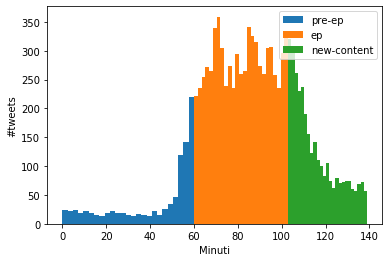

In [8]:
freq_pre_ep, _ , _ = plt.hist(pre_ep,25,label='pre-ep')
freq_ep2x04, xep2x04 , _ = plt.hist(ep,25,label='ep')
freq_inedito,_,_= plt.hist(inedito,25,label='new-content')
plt.legend(loc='upper right')
plt.xlabel('Minuti')
plt.ylabel('#tweets')
plt.show()

In [9]:
confronto_distrib_2x04 = pd.DataFrame(index=['Pre_ep','Episode','New-content'])
confronto_distrib_2x04['median'] = [np.median(freq) for freq in [freq_pre_ep,freq_ep2x04,freq_inedito]]
confronto_distrib_2x04['iqr'] = [iqr(freq) for freq in [freq_pre_ep,freq_ep2x04,freq_inedito]]

In [10]:
confronto_distrib_2x04

,median,iqr
Pre_ep,19.0,8.0
Episode,274.0,49.0
New-content,83.0,84.0


## Episodes 9x07-08: The Zygon Invasion / Inversion

In [13]:
dfsporco_zygon = pd.read_json('tweet/tweets_zygon.json')
tweets_zygon = dfsporco_zygon['data']
interactions_zygon = [{'author_id':tweet['author_id'],\
           'text': tweet['text'],\
           'created_at': tweet['created_at']}\
          for tweet in tweets_zygon]

df_zygon = pd.DataFrame(interactions_zygon)

In [14]:
df_zygon['time']= list(map(get_time,df_zygon['created_at']))
oldest_time = min(df_zygon['time'])
df_zygon.time = df_zygon.time.apply(lambda d: (d - oldest_time).total_seconds()/60)
df_zygon.head()

,author_id,text,created_at,time
0,790329697255190528,RT @Emily_Rosina: TODAY! ZYGONS!\n\n6:30pm The...,2020-05-10T17:29:03.000Z,0.000000
1,1546656000,"RT @Jali_Cat: “Christopher Wray, you’re not on...",2020-05-10T17:29:09.000Z,0.100000
2,1241375085509967872,@Meteorslog @bbcdoctorwho Take a day off son. ...,2020-05-10T17:29:10.000Z,0.116667
3,2678278945,RT @Emily_Rosina: Join in with a national twee...,2020-05-10T17:29:40.000Z,0.616667
4,1362920568,RT @ingridoliver100: Tonight from 7.15pm onwar...,2020-05-10T17:30:16.000Z,1.216667


In [15]:
inedito_zygon = df_zygon[df_zygon['time']<=30]['time']
premier = df_zygon[(df_zygon['time']>30) & (df_zygon['time']<=45)]['time']
ep1 = df_zygon[(df_zygon['time']>45) & (df_zygon['time']<=90)]['time']
tea = df_zygon[(df_zygon['time']>90) & (df_zygon['time']<=105)]['time']
ep2 = df_zygon[(df_zygon['time']>105) & (df_zygon['time']<=150)]['time']
after_ep_zygon = df_zygon[df_zygon['time']>150]['time']

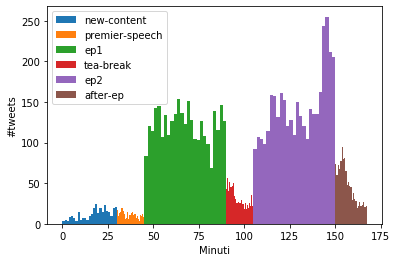

In [16]:
freq_inedito_zygon, _ , _ = plt.hist(inedito_zygon,25,label='new-content')
freq_premier, _ , _ = plt.hist(premier,25,label='premier-speech')
freq_ep1_zygon, xep1_zygon , _ = plt.hist(ep1,25,label='ep1')
freq_tea, _ , _ = plt.hist(tea,25,label='tea-break')
freq_ep2_zygon, xep2_zygon , _ = plt.hist(ep2,25,label='ep2')
freq_after_ep_zygon, _ , _ = plt.hist(after_ep_zygon,25,label='after-ep')
plt.legend(loc='upper left')
plt.xlabel('Minuti')
plt.ylabel('#tweets')
plt.show()

In [17]:
freqs_zygon = [freq_inedito_zygon,freq_premier,freq_ep1_zygon,freq_tea,freq_ep2_zygon,freq_after_ep_zygon]
confronto_distrib_zygon = pd.DataFrame(index=['New-content','Premier_Speech','Episode1','Tea_break','Episode2',\
                                             'After'])
confronto_distrib_zygon['median'] = [np.median(freq) for freq in freqs_zygon]
confronto_distrib_zygon['iqr'] = [iqr(freq) for freq in freqs_zygon]

In [18]:
confronto_distrib_zygon

,median,iqr
New-content,10.0,9.0
Premier_Speech,11.0,5.0
Episode1,126.0,29.0
Tea_break,26.0,16.0
Episode2,135.0,44.0
After,45.0,40.0


# Highlights

In [16]:
def get_best_minutes(bins_value,bins,delay=1):
    mode = max(bins_value)
    mode_index = [i for i in range(0,len(bins)-1) if bins_value[i] == mode][-1]
    if mode_index == 0: 
        start = np.floor(bins[0])
        end = np.ceil(bins[2])
    else:
        start = np.floor(bins[mode_index-1])
        end = np.ceil(bins[mode_index+1])
    
    return (start-delay),(end-delay)

In [17]:
start2x04 = 60.0
start9x07 = 45.0
start9x08 = 105.0

In [18]:
best2x04 = get_best_minutes(freq_ep2x04,\
                            list(map(lambda x: x-start2x04,xep2x04)))
print("Best minutes of 2x04: {}".format(best2x04))

Best minutes of 2x04: (7.0, 12.0)


In [19]:
best9x07 = get_best_minutes(freq_ep1_zygon,\
                            list(map(lambda x: x-start9x07,xep1_zygon)))
print("Best minutes of 9x07: {}".format(best9x07))

Best minutes of 9x07: (15.0, 19.0)


In [20]:
best9x08 = get_best_minutes(freq_ep2_zygon,\
                            list(map(lambda x: x-start9x08,xep2_zygon)))
print("Best minutes of 9x08: {}".format(best9x08))

Best minutes of 9x08: (36.0, 41.0)


# The Zygon Inversion: Best clip and related tweets

In [21]:
from moviepy.video.io.ffmpeg_tools import ffmpeg_extract_subclip

def get_highlights_clip(source,highlights):
    start_time, end_time = highlights
    start_time*=60
    end_time*=60
    target = source.split('.')[0]+'_best.mp4'
    ffmpeg_extract_subclip(source, start_time, end_time, targetname=target)
    
def get_highlights_tweets_text(influencers_id,df_ep,time_start_ep,highlights_time):
    influencers_tweets = [tweet for _,tweet in df_ep.iterrows()\
                          if (tweet['author_id'] in influencers_id)]
    
    highlights_tweets = list(filter(lambda x: (x['time']-time_start_ep)>=highlights_time[0] and \
                                          (x['time']-time_start_ep)<=highlights_time[1] and \
                                         'RT' not in x['text'],influencers_tweets))
    
    highlights_tweets_text = [tweet['text'] for tweet in highlights_tweets]
    
    return highlights_tweets_text

In [22]:
with open('info/analysis_utility.json','r') as rf:
    influencers = eval(json.load(rf)['influencers'])

In [23]:
twitter_keys = json.load(open('info/application_keys.json'))['twitter']
consumer_key = twitter_keys['API_key']
consumer_secret = twitter_keys['API_secret']
bearer_token = twitter.oauth2_dance(consumer_key=consumer_key,consumer_secret=consumer_secret)
twitter_api = twitter.Twitter(auth=twitter.OAuth2(bearer_token=bearer_token))

In [24]:
influencers_id = [twitter_api.users.show(screen_name=influencer)['id_str'] for influencer in influencers]

In [25]:
get_highlights_clip('the_zygon_inversion.mkv',best9x08)

Moviepy - Running:
>>> "+ " ".join(cmd)
Moviepy - Command successful


In [26]:
from IPython.display import HTML

# Youtube
HTML('<iframe width="560" height="315" src="https://www.youtube.com/embed/BJP9o4BEziI" frameborder="0" allow="accelerometer; autoplay; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>')


/home/manueldileo/anaconda3/lib/python3.7/site-packages/IPython/core/display.py:701: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")


In [27]:
get_highlights_tweets_text(influencers_id,df_zygon,start9x08,best9x08)

['Peter doing this speech was the most extraordinary thing I’ve ever witnessed. Filmed it 3 times, pages of dialogue, each time he did something different. We were all crying, all of us - Jenna, Jemma &amp; me. Was a nightmare for continuity. Extraordinary writing by @mrpeterharness.']